# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

training_file = '../data/traffic-signs-data/train.p'
validation_file= '../data/traffic-signs-data/valid.p'
testing_file = '../data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

def print_data_shapes():
    
    n_train = len(X_train)
    n_test = len(X_test)
    n_valid = len(X_valid)
    image_shape = X_train.shape[1:]
    n_classes = len(np.unique(y_train))
    print("Number of training examples =", n_train)
    print("Number of testing examples =", n_test)
    print("Number of validation examples =", n_valid)
    print("Image data shape =", image_shape)
    print("Number of classes =", n_classes)
    
print_data_shapes()

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class id, Frequency, Sign name


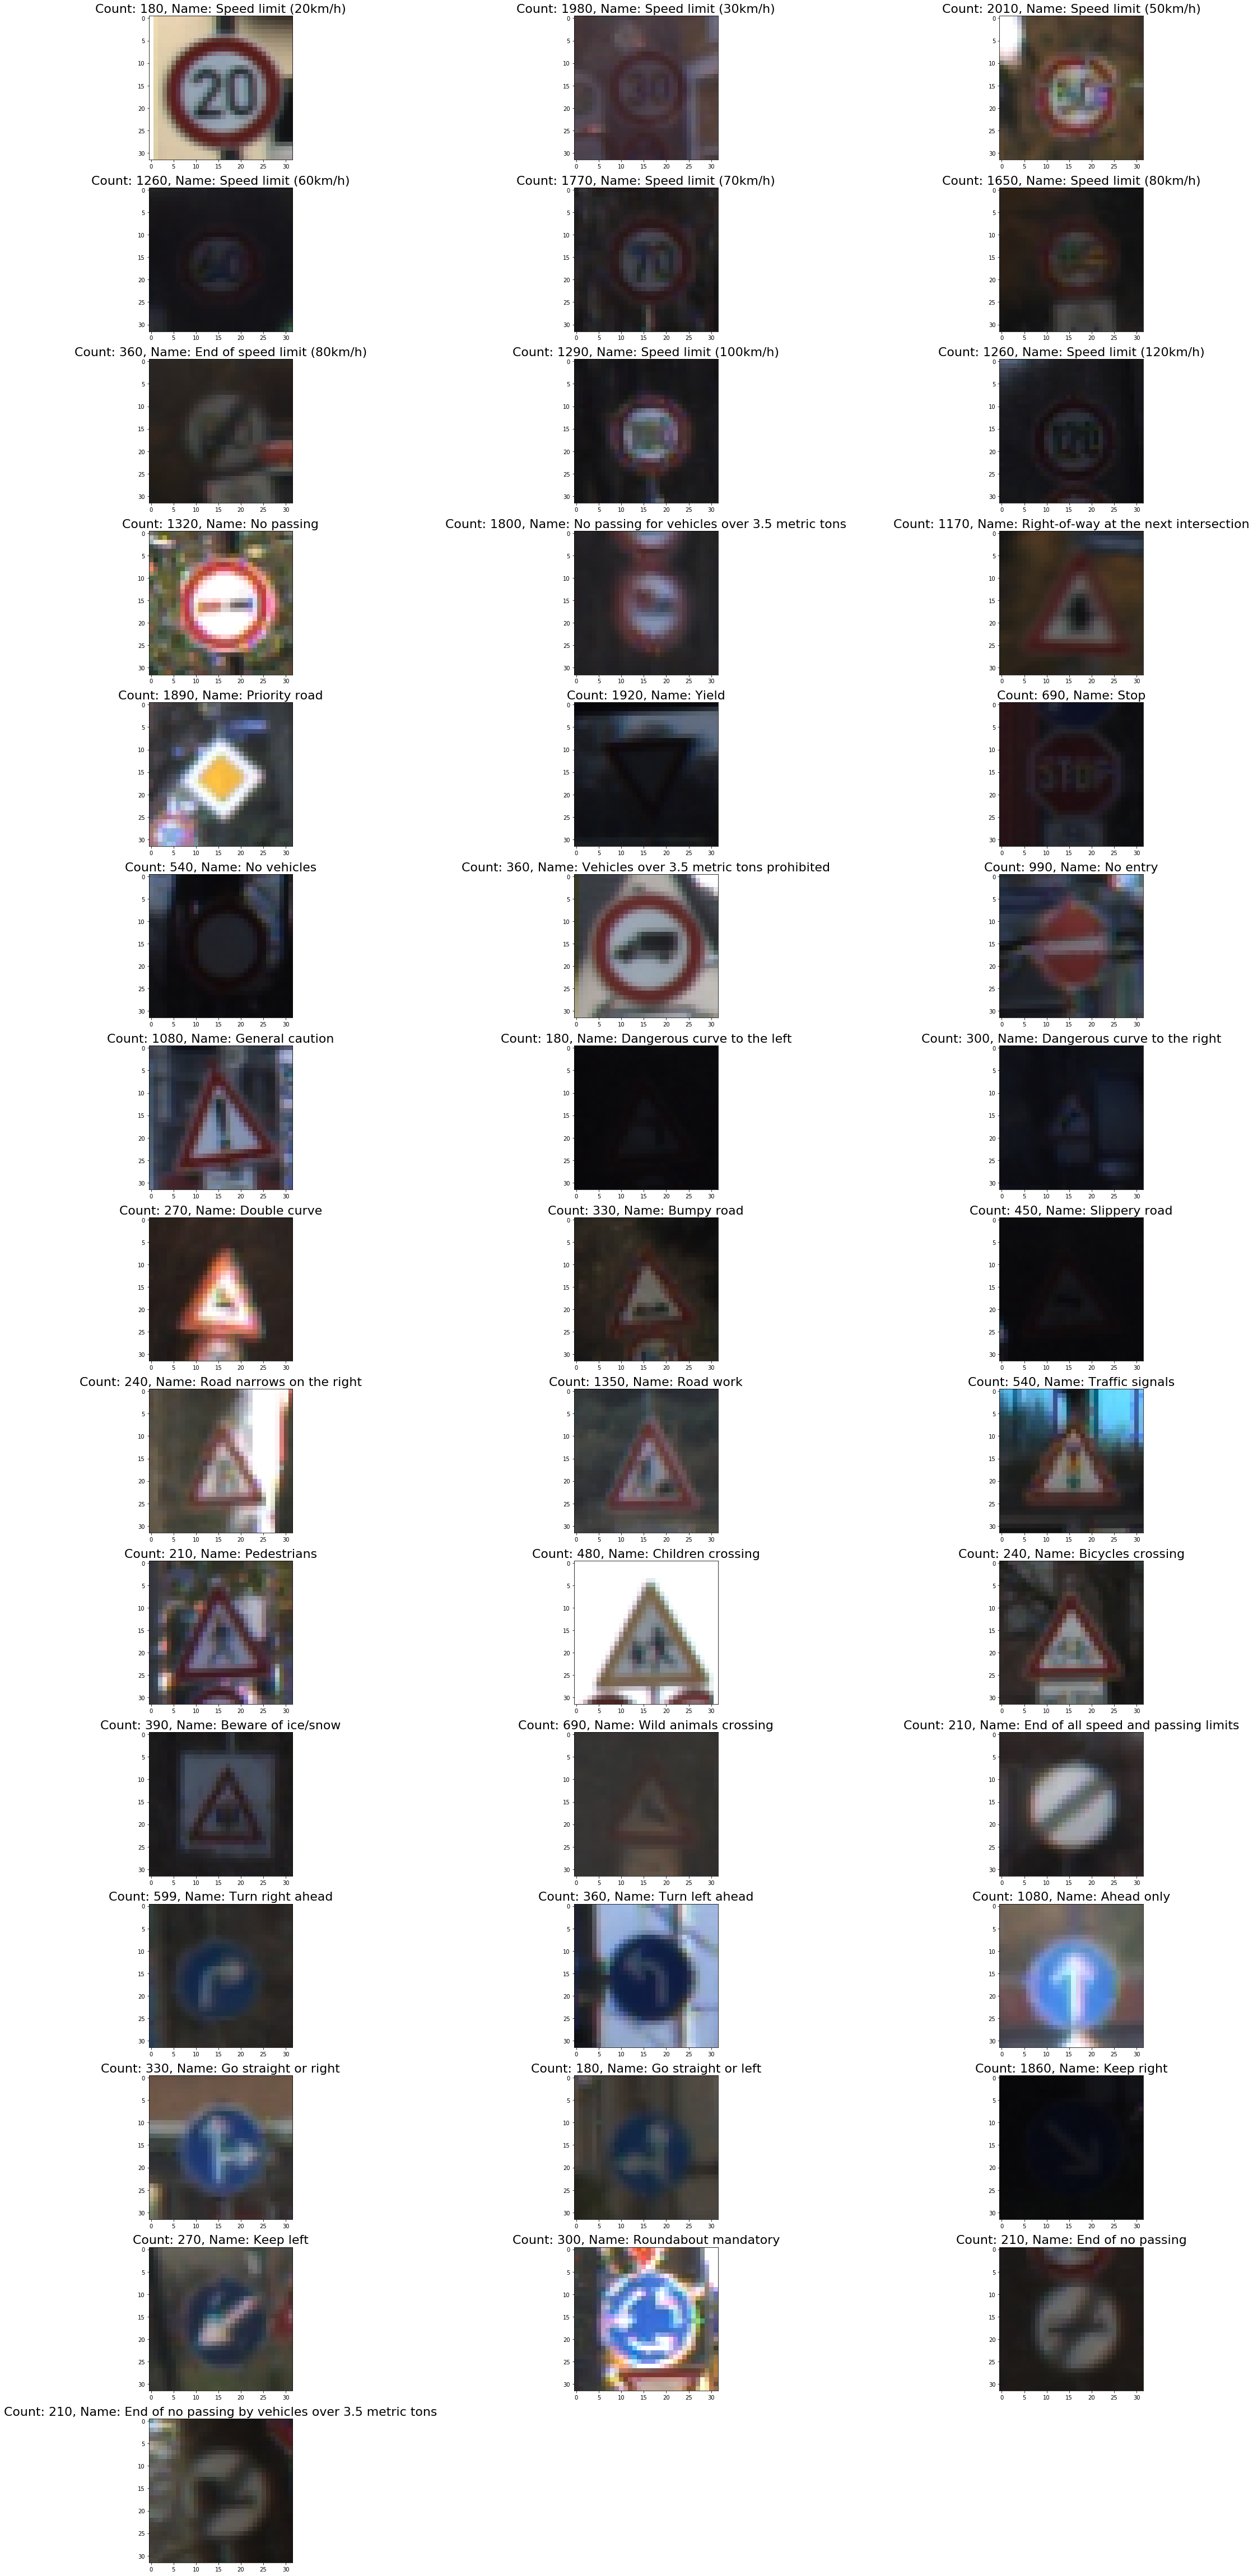

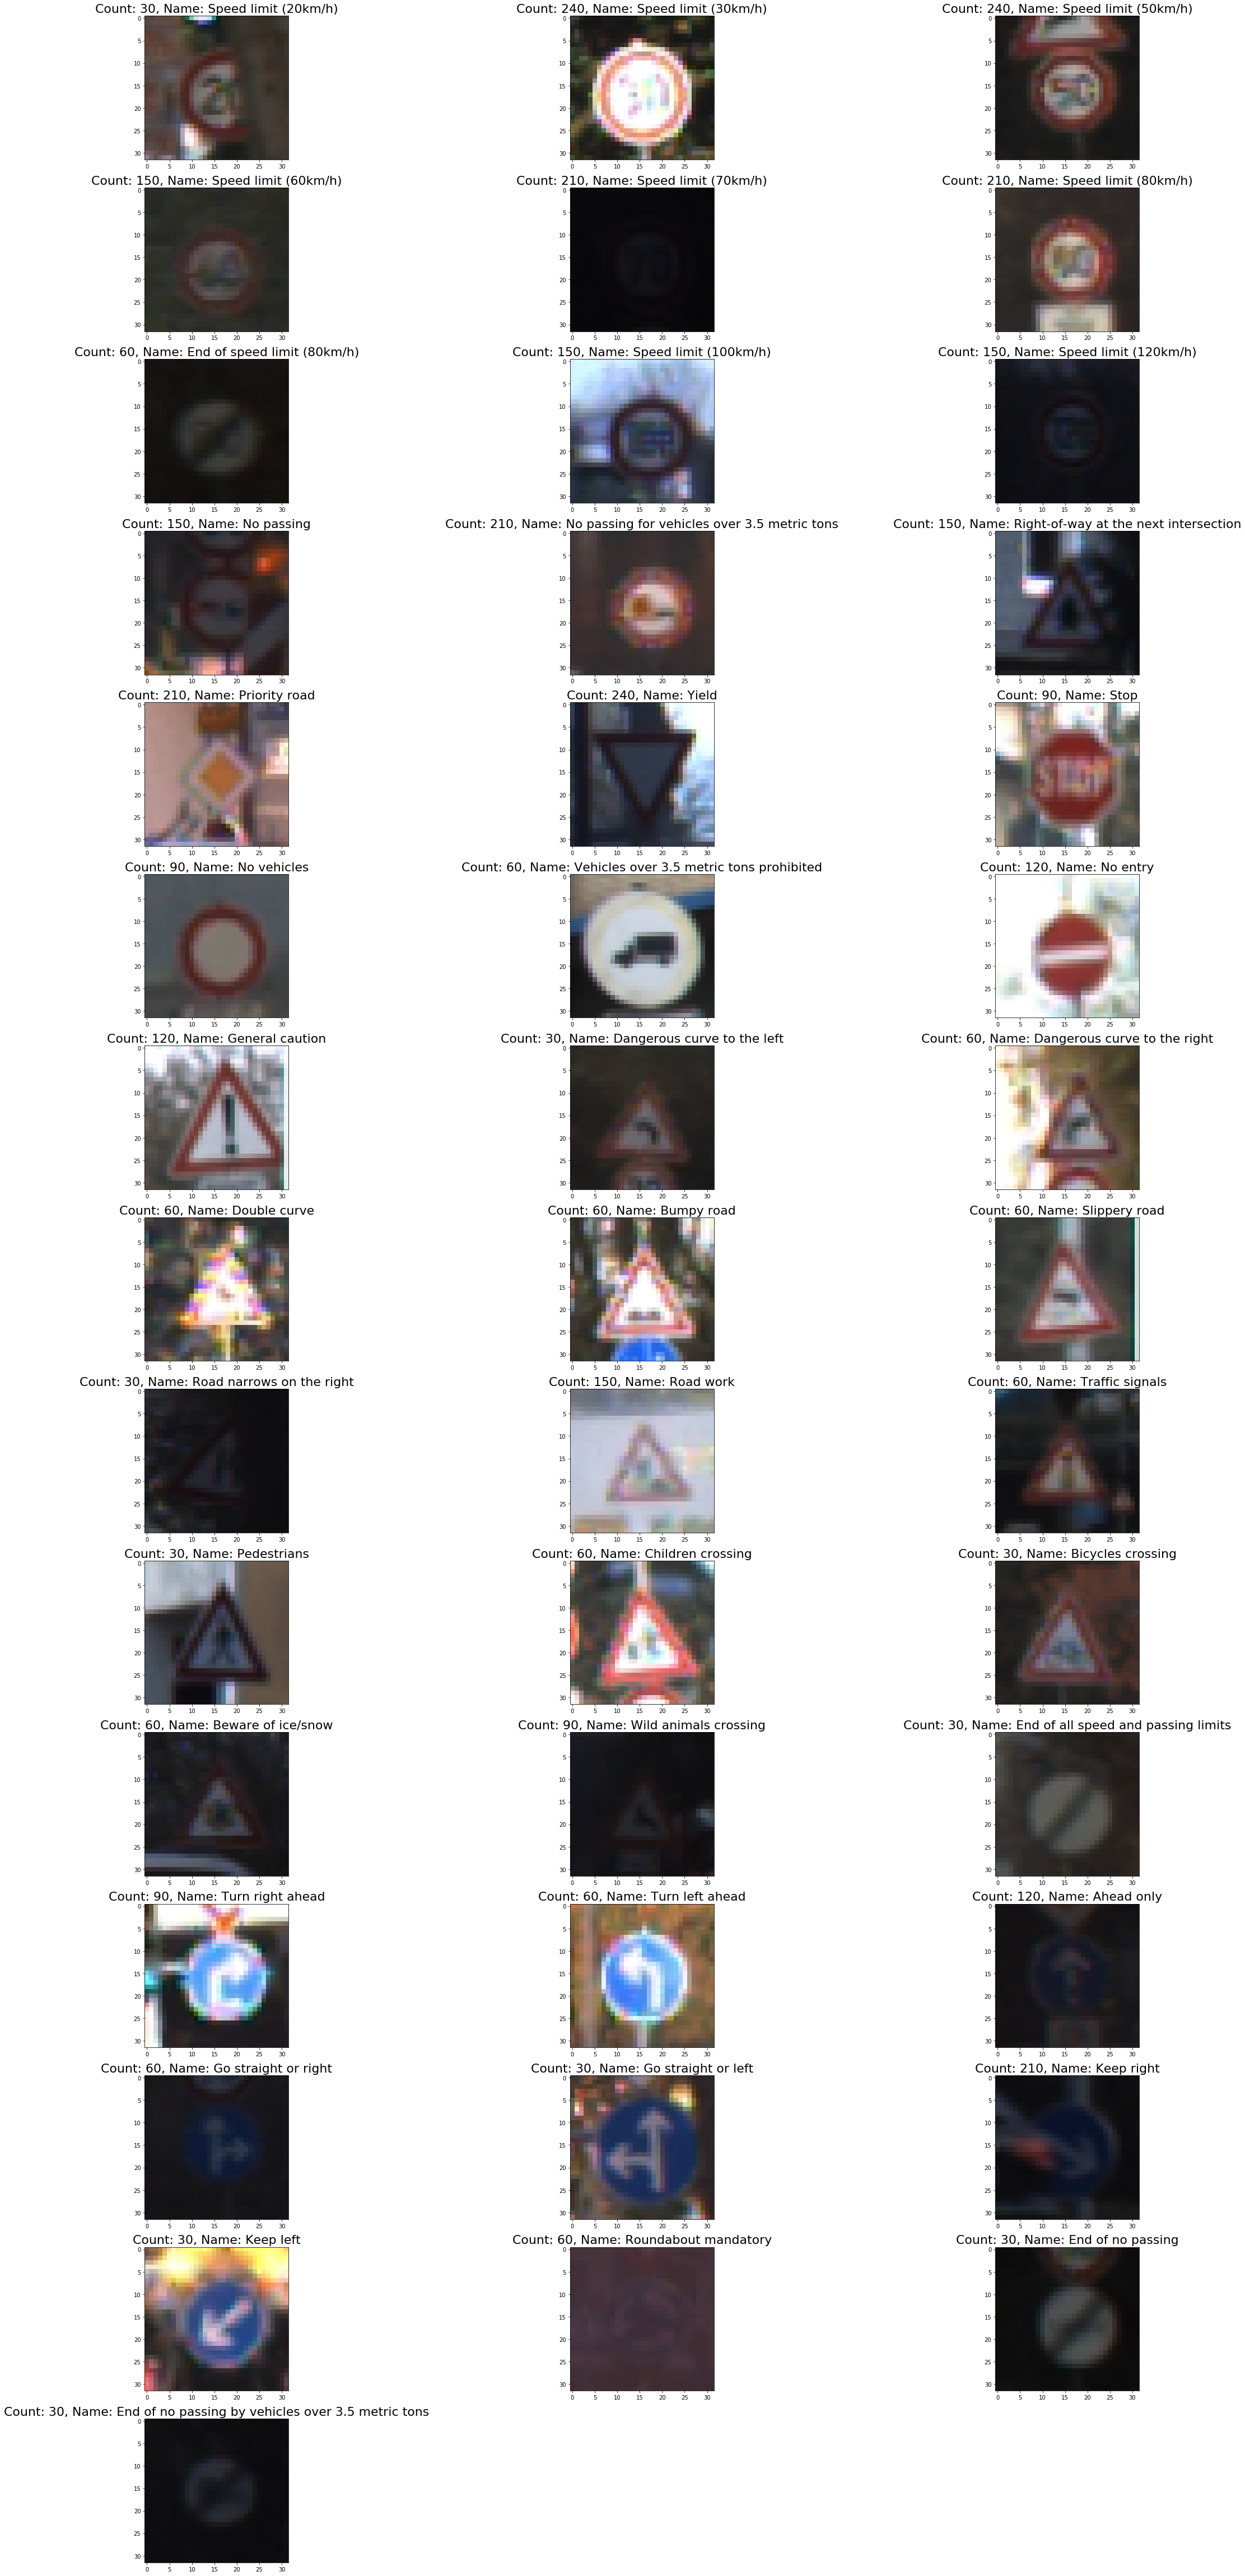

In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

id_name_map = pd.read_csv("./signnames.csv", index_col=["ClassId"])

def show_data(X_data, y_data):
    plt.figure(figsize=(32, 64))
    for image_id, freq in zip(*np.unique(y_data, return_counts=True)):

        index = np.where(y_data==image_id)[0][0]
        image = X_data[index].squeeze()
        plt.subplot(15, 3, image_id + 1)
        plt.tight_layout()
        plt.imshow(image)
        plt.title("Count: {0}, Name: {1}".format(freq, id_name_map.loc[image_id]['SignName']), fontsize=22)

print("Class id, Frequency, Sign name")
show_data(X_train, y_train)
show_data(X_valid, y_valid)

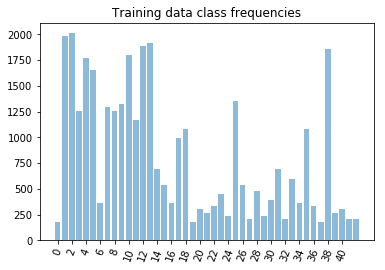

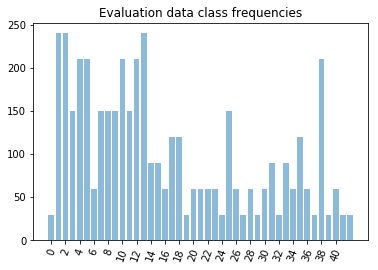

In [4]:
import matplotlib.pyplot as plt;
import numpy as np
import matplotlib.pyplot as plt

def plot_class_frequencies(title, data):
    labels, freqs = np.unique(data, return_counts=True)
 
    plt.bar(labels, freqs, align='center', alpha=0.5)
    plt.xticks(rotation=70)
    plt.xticks(np.arange(0, 42, 2))
    plt.title(title)
 
    plt.show()
    
plot_class_frequencies('Training data class frequencies', y_train)
plot_class_frequencies('Evaluation data class frequencies',  y_valid)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import matplotlib.image as mpimg
import numpy as np
import cv2

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def convert_to_gray_scale(data):
    print(data.shape)
    gray = np.empty([len(data), 32, 32, 1])
    for id, image in enumerate(data):
        image = grayscale(data[id, :, :, :]).reshape(32, 32, 1)
        gray[id] = image
    plt.imshow(gray[0].squeeze())
    print(gray.shape)
    return gray

def normalize(data):
    return (data / 225) - 0.5
    

#X_train = convert_to_gray_scale(X_train)
#X_valid = convert_to_gray_scale(X_valid)

X_train = normalize(X_train)
X_valid = normalize(X_valid)

### Model Architecture

In [10]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
number_of_color_channels = 3

def network(x):
    mu = 0
    sigma = 0.1
    keep_prob = 0.7
    
    conv_w1 = tf.Variable(tf.truncated_normal(shape=(5, 5, number_of_color_channels, 6), mean = mu, stddev = sigma))
    conv_b1 = tf.Variable(tf.zeros(6))
    conv = tf.nn.conv2d(x, conv_w1, strides=[1,1,1,1], padding='VALID') + conv_b1
    conv = tf.nn.elu(conv)
    conv = tf.nn.max_pool(conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    conv_w2 = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma))
    conv_b2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv, conv_w2, strides=[1,1,1,1], padding='VALID') + conv_b2
    conv2 = tf.nn.elu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    fc0 = flatten(conv2)
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    fc1_w1 = tf.Variable(tf.truncated_normal(shape=(576, 300), mean = mu, stddev = sigma))
    fc1_b1 = tf.Variable(tf.zeros(300))
    fc1 = tf.matmul(fc0, fc1_w1) + fc1_b1
    fc1 = tf.nn.elu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    fc2_w2 = tf.Variable(tf.truncated_normal(shape=(300, 120), mean = mu, stddev = sigma))
    fc2_b2 = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1, fc2_w2) + fc2_b2
    fc2 = tf.nn.elu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    logits_w3 = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    logits_b3 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, logits_w3) + logits_b3
                            
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
learning_rate = 0.001
BATCH_SIZE = 128
EPOCHS = 100
logs_path = "./logs/"

x = tf.placeholder(tf.float32, (None, 32, 32, number_of_color_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits=network(x)

softmax = tf.nn.softmax(logits)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)
training_operation = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("accuracy-train", accuracy_operation)
tf.summary.scalar("loss-train", loss)
summary_op = tf.summary.merge_all()

accuracy_eval = tf.summary.scalar("accuracy-eval", accuracy_operation)
loss_eval = tf.summary.scalar("loss-eval", loss)
summary_op_eval = tf.summary.merge([accuracy_eval, loss_eval])

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
    
print("Training...")
print()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    train_writer = tf.summary.FileWriter(logs_path, graph=sess.graph)
    eval_writer = tf.summary.FileWriter(logs_path)

    number_of_iterations = 0
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        num_examples = len(X_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            number_of_iterations += 1
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, train_summary = sess.run([training_operation, summary_op], feed_dict={x: batch_x, y: batch_y})
            #train_writer.add_summary(train_summary, i * num_examples + offset)
            #train_writer.flush()
            
            #if (number_of_iterations % 100) == 0:
            #    eval_summary, _, _ = sess.run([summary_op_eval, accuracy_operation, loss],
            #                    feed_dict={x: X_valid, y: y_valid})
            #    eval_writer.add_summary(eval_summary, number_of_iterations)
            #    eval_writer.flush()
        
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}, Training Accuracy = {:.3f}".format(validation_accuracy, training_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.728, Training Accuracy = 0.802
EPOCH 2 ...
Validation Accuracy = 0.819, Training Accuracy = 0.889
EPOCH 3 ...
Validation Accuracy = 0.842, Training Accuracy = 0.914
EPOCH 4 ...
Validation Accuracy = 0.867, Training Accuracy = 0.933
EPOCH 5 ...
Validation Accuracy = 0.867, Training Accuracy = 0.943
EPOCH 6 ...
Validation Accuracy = 0.871, Training Accuracy = 0.948
EPOCH 7 ...
Validation Accuracy = 0.882, Training Accuracy = 0.955
EPOCH 8 ...
Validation Accuracy = 0.890, Training Accuracy = 0.962
EPOCH 9 ...
Validation Accuracy = 0.892, Training Accuracy = 0.963
EPOCH 10 ...
Validation Accuracy = 0.897, Training Accuracy = 0.967
EPOCH 11 ...
Validation Accuracy = 0.899, Training Accuracy = 0.969
EPOCH 12 ...
Validation Accuracy = 0.903, Training Accuracy = 0.971
EPOCH 13 ...
Validation Accuracy = 0.906, Training Accuracy = 0.975
EPOCH 14 ...
Validation Accuracy = 0.906, Training Accuracy = 0.972
EPOCH 15 ...
Validation Accuracy = 0.907, Tr

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

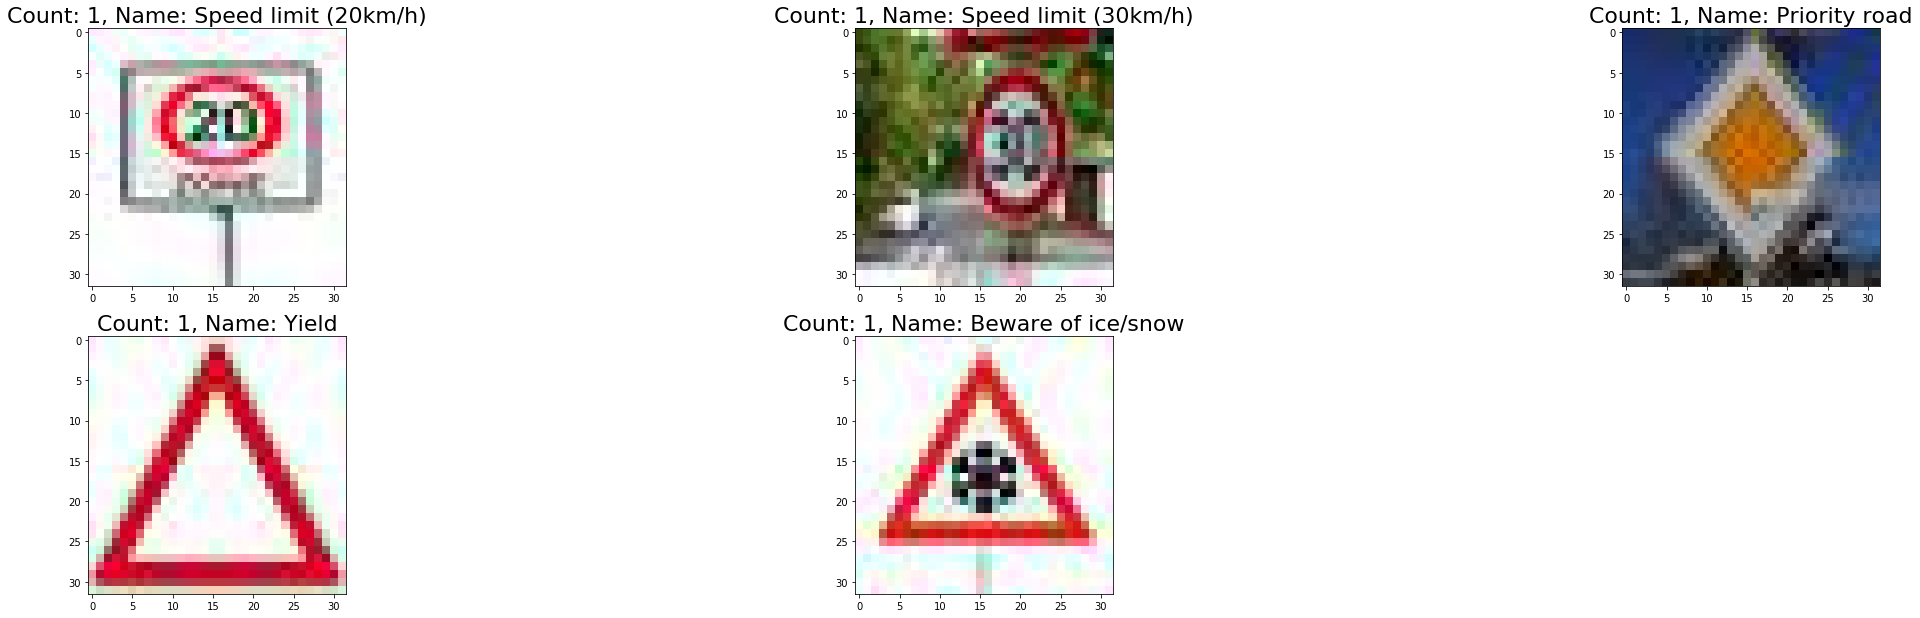

In [12]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

id_name_map = pd.read_csv("./signnames.csv", index_col=["ClassId"])

X_test = []
for i in range(1, 6):
    image = mpimg.imread('./test_images/' + str(i) + '.jpg')
    X_test.append(image)
X_test = np.array(X_test)
y_test = np.array([30, 1, 0, 13, 12])

def show_data(X_data, y_data):
    plt.figure(figsize=(32, 64))
    position = 1
    for image_id, freq in zip(*np.unique(y_data, return_counts=True)):
        index = np.where(y_data==image_id)[0][0]
        image = X_data[index].squeeze()
        plt.subplot(15, 3, position)
        position += 1
        plt.tight_layout()
        plt.imshow(image)
        plt.title("Count: {0}, Name: {1}".format(freq, id_name_map.loc[image_id]['SignName']), fontsize=22)
        
show_data(X_test, y_test)

### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_test = normalize(X_test)
print(y_test)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Predicted classes:')
    print('')
    predicted_classes = sess.run([tf.argmax(logits, 1)], feed_dict={x: X_test, y: y_test})
    for i in predicted_classes:
        print(id_name_map.loc[i]['SignName'])

[30  1  0 13 12]
Predicted classes:

ClassId
11    Right-of-way at the next intersection
25                                Road work
2                      Speed limit (50km/h)
24                Road narrows on the right
12                            Priority road
Name: SignName, dtype: object


### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test})
    print("Test Accuracy = {:.3f}".format(accuracy))
    print('')

Test Accuracy = 0.200



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    top_five_prob = sess.run([tf.nn.top_k(softmax, 5)], feed_dict={x: X_test, y: y_test})
    print(top_five_prob)

[TopKV2(values=array([[  1.00000000e+00,   4.46899878e-10,   2.11570643e-13,
          1.94785628e-14,   7.58876299e-15],
       [  1.00000000e+00,   4.06699036e-10,   6.00576837e-12,
          1.20186806e-13,   1.82914393e-14],
       [  6.46531403e-01,   3.52182776e-01,   1.28581852e-03,
          3.50568685e-10,   3.06506598e-10],
       [  9.99985337e-01,   1.00011248e-05,   3.58901320e-06,
          1.12651264e-06,   1.78167010e-08],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[30, 11, 16, 42, 12],
       [25, 23, 13, 30,  3],
       [13,  7,  2,  5, 12],
       [22, 29, 30, 38, 28],
       [12,  0,  1,  2,  3]], dtype=int32))]
